In [1]:
import pandas as pd
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

# Breast Cancer dataset exploration


#### Import dataset

In [9]:
df = pd.read_csv("datasets/breast-cancer.data", names= ["Class", "age", "menopause", "tumor-size", "inv-nodes", "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"],
            header= None)

### dataset initial insights

In [16]:
print("The columns of this dataset are:\n", *list(df.columns))
print("Shape = ", df.shape)

The columns of this dataset are:
 Class age menopause tumor-size inv-nodes node-caps deg-malig breast breast-quad irradiat
Shape =  (286, 10)


In [14]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Null-Values Treatment

In [25]:
df = df.replace(["?"], np.NaN)
print(df.isna().sum())
df = df.dropna()
print("The new shape is ", df.shape)

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64
The new shape is  (277, 10)


### Synthetic description

Description of the Object type data ("O"), and of the numerical data

In [55]:
df.describe(include= "O")

,Class,age,menopause,tumor-size,inv-nodes,node-caps,breast,breast-quad,irradiat
count,277,277,277,277,277,277,277,277,277
unique,2,6,3,11,7,2,2,5,2
top,no-recurrence-events,50-59,premeno,30-34,0-2,no,left,left_low,no
freq,196,91,149,57,209,221,145,106,215


In [56]:
df.describe()

,deg-malig
count,277.000000
mean,2.057762
std,0.729989
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


### Histograms

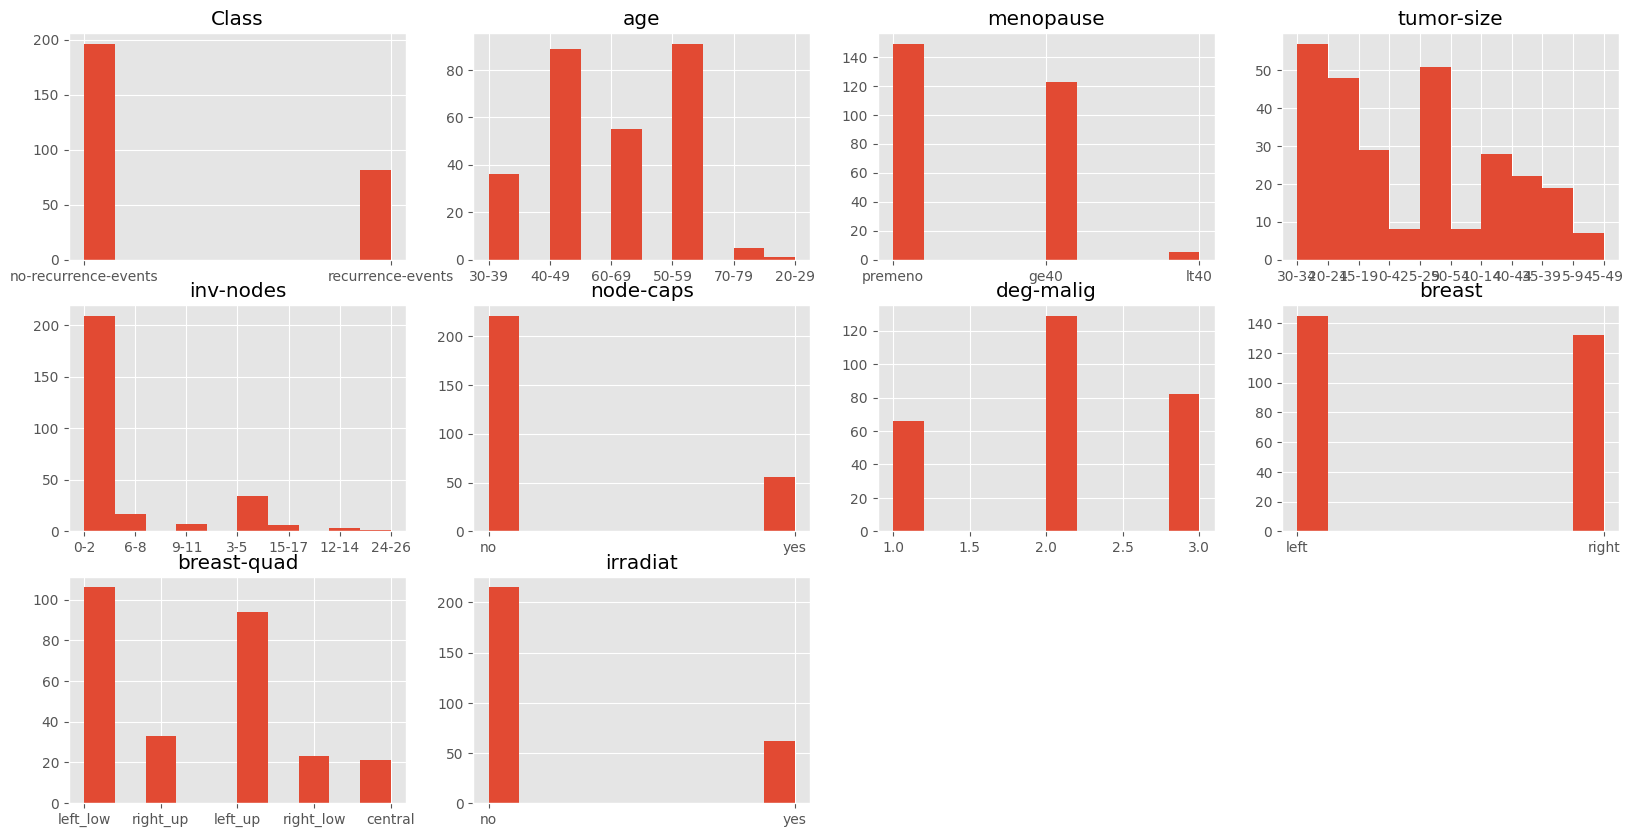

In [44]:
plt.figure(figsize=(20, len(df.columns)//4+1*8))
pos= 1
for i in df.columns:
    plt.subplot(len(df.columns)//4+1, 4 , pos)
    plt.title(str(i))
    df[i].hist();
    pos+= 1

### Pairplot

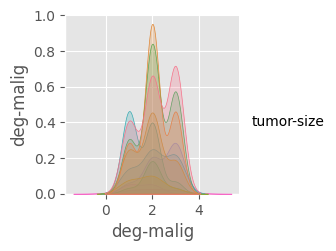

In [60]:
sns.pairplot(df, hue= "tumor-size", diag_kind= "kde");